In [158]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [159]:
warnings.filterwarnings("ignore")

In [160]:
link = "/Users/maxkucher/preprocessing/mlops/astma/synthetic_asthma_dataset.csv"
data = pd.read_csv(link)
data

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,NaN,Low,Sedentary,Indoor,NaN,0.67,0,580.6,18.7,0,NaN
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,NaN
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,NaN,0.28,0,459.1,20.3,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,NaN,0.44,0,415.9,25.0,0,NaN


In [161]:
data.describe

<bound method NDFrame.describe of       Patient_ID  Age  Gender   BMI Smoking_Status  Family_History Allergies  \
0     ASTH100000   52  Female  27.6         Former               1       NaN   
1     ASTH100001   15    Male  24.6         Former               0      Dust   
2     ASTH100002   72  Female  17.6          Never               0       NaN   
3     ASTH100003   61    Male  16.8          Never               0  Multiple   
4     ASTH100004   21    Male  30.2          Never               0       NaN   
...          ...  ...     ...   ...            ...             ...       ...   
9995  ASTH109995   70    Male  25.0          Never               0       NaN   
9996  ASTH109996   78  Female  24.8          Never               0    Pollen   
9997  ASTH109997   58    Male  30.1         Former               1    Pollen   
9998  ASTH109998   88  Female  31.2         Former               0    Pollen   
9999  ASTH109999   13  Female  16.4         Former               1  Multiple   

     

In [162]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Family_History', 'Allergies', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow',
       'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level'],
      dtype='object')

In [163]:
for column in data.columns:
    value = data[column].isnull().sum()
    print(f"{column}: {value}")

Patient_ID: 0
Age: 0
Gender: 0
BMI: 0
Smoking_Status: 0
Family_History: 0
Allergies: 2936
Air_Pollution_Level: 0
Physical_Activity_Level: 0
Occupation_Type: 0
Comorbidities: 4967
Medication_Adherence: 0
Number_of_ER_Visits: 0
Peak_Expiratory_Flow: 0
FeNO_Level: 0
Has_Asthma: 0
Asthma_Control_Level: 7567


In [164]:
for column in data.columns:
    value = data[column].isnull().sum()
    if value > 0 and column != "Asthma_Control_Level":
        print(f"Column name: {column}")
        value_2_fill = data[column].value_counts().idxmax()
        data[column].fillna(value_2_fill, inplace=True)

Column name: Allergies
Column name: Comorbidities


In [165]:
for column in data.columns:
    value = data[column].isnull().sum()
    print(f"{column}: {value}")

Patient_ID: 0
Age: 0
Gender: 0
BMI: 0
Smoking_Status: 0
Family_History: 0
Allergies: 0
Air_Pollution_Level: 0
Physical_Activity_Level: 0
Occupation_Type: 0
Comorbidities: 0
Medication_Adherence: 0
Number_of_ER_Visits: 0
Peak_Expiratory_Flow: 0
FeNO_Level: 0
Has_Asthma: 0
Asthma_Control_Level: 7567


In [166]:
data

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,Dust,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,Dust,Moderate,Moderate,Indoor,Diabetes,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,Dust,Moderate,Active,Indoor,Diabetes,0.82,3,535.0,27.7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,Dust,Low,Sedentary,Indoor,Diabetes,0.67,0,580.6,18.7,0,NaN
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,NaN
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,Diabetes,0.28,0,459.1,20.3,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,Diabetes,0.44,0,415.9,25.0,0,NaN


In [167]:
data = data.drop(["Patient_ID"], axis="columns")

In [168]:
data

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,52,Female,27.6,Former,1,Dust,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,72,Female,17.6,Never,0,Dust,Moderate,Moderate,Indoor,Diabetes,0.38,0,303.3,15.3,0,NaN
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,21,Male,30.2,Never,0,Dust,Moderate,Active,Indoor,Diabetes,0.82,3,535.0,27.7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,Male,25.0,Never,0,Dust,Low,Sedentary,Indoor,Diabetes,0.67,0,580.6,18.7,0,NaN
9996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,NaN
9997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,Diabetes,0.28,0,459.1,20.3,1,Not Controlled
9998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,Diabetes,0.44,0,415.9,25.0,0,NaN


In [169]:
data.loc[data["Has_Asthma"] == 0, "Asthma_Control_Level"] = "No astma"

In [170]:
data

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,52,Female,27.6,Former,1,Dust,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,No astma
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,No astma
2,72,Female,17.6,Never,0,Dust,Moderate,Moderate,Indoor,Diabetes,0.38,0,303.3,15.3,0,No astma
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,21,Male,30.2,Never,0,Dust,Moderate,Active,Indoor,Diabetes,0.82,3,535.0,27.7,0,No astma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,Male,25.0,Never,0,Dust,Low,Sedentary,Indoor,Diabetes,0.67,0,580.6,18.7,0,No astma
9996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,No astma
9997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,Diabetes,0.28,0,459.1,20.3,1,Not Controlled
9998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,Diabetes,0.44,0,415.9,25.0,0,No astma


In [171]:
data["Asthma_Control_Level"].isnull().sum()

0

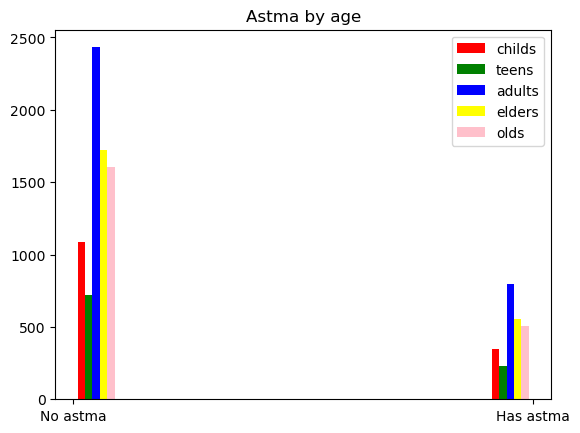

In [172]:
childs = data[(data["Age"].min() <= data["Age"]) & (data["Age"] <= 13)]["Has_Asthma"]
teens = data[(13 < data["Age"]) & (data["Age"] <= 21)]["Has_Asthma"]
adults = data[(21 < data["Age"]) & (data["Age"] <= 50)]["Has_Asthma"]
elders = data[(50 < data["Age"]) & (data["Age"] <= 70)]["Has_Asthma"]
olds = data[(70 < data["Age"]) & (data["Age"] <= data["Age"].max())]["Has_Asthma"]


plt.title("Astma by age")
plt.hist([childs, teens, adults, elders, olds], color=["red", "green", "blue", "yellow", "pink"], label=["childs", "teens", "adults", "elders", "olds"])
plt.xticks([0, 1], ["No astma", "Has astma"])
plt.legend()

In [173]:
data["Has_Asthma"].value_counts()

Has_Asthma
0    7567
1    2433
Name: count, dtype: int64

In [174]:
data["Gender"].value_counts()

Gender
Female    4814
Male      4786
Other      400
Name: count, dtype: int64

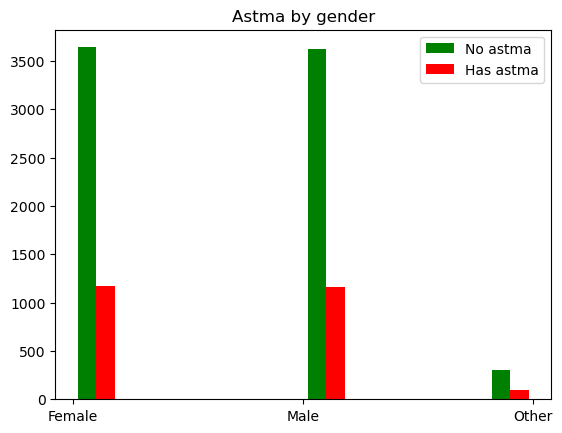

In [175]:
no_astma = data[data["Has_Asthma"] == 0]["Gender"]
has_astma = data[data["Has_Asthma"] == 1]["Gender"]


plt.title("Astma by gender")
plt.hist([no_astma, has_astma], color=["green", "red"], label=["No astma", "Has astma"])
plt.xticks(["Male", "Female", "Other"])
plt.legend()

In [176]:
data["Asthma_Control_Level"].value_counts()

Asthma_Control_Level
No astma             7567
Not Controlled       1229
Poorly Controlled    1120
Well Controlled        84
Name: count, dtype: int64

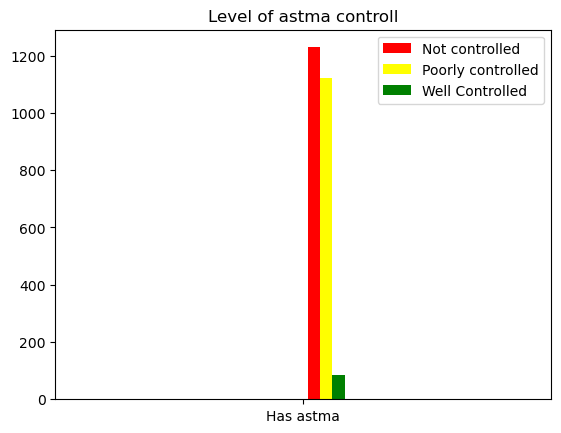

In [177]:
not_controlled = data[data["Asthma_Control_Level"] == "Not Controlled"]["Has_Asthma"]
poor_controlled = data[data["Asthma_Control_Level"] == "Poorly Controlled"]["Has_Asthma"]
well_controlled = data[data["Asthma_Control_Level"] == "Well Controlled"]["Has_Asthma"]

plt.title("Level of astma controll")
plt.hist([not_controlled, poor_controlled, well_controlled], color=["red", "yellow", "green"], label=["Not controlled", "Poorly controlled", "Well Controlled"])
plt.xticks([1], ["Has astma"])
plt.legend()

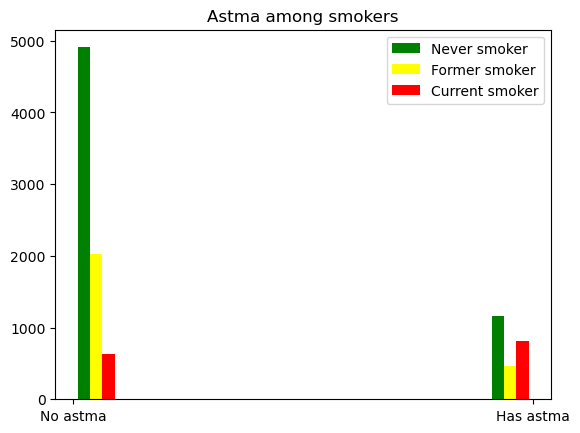

In [178]:
never = data[data["Smoking_Status"] == "Never"]["Has_Asthma"]
former = data[data["Smoking_Status"] == "Former"]["Has_Asthma"]
current = data[data["Smoking_Status"] == "Current"]["Has_Asthma"]

plt.title("Astma among smokers")
plt.hist([never, former, current], color=["green", "yellow", "red"], label=["Never smoker", "Former smoker", "Current smoker"])
plt.xticks([0, 1], ["No astma", "Has astma"])
plt.legend()

In [179]:
data["Air_Pollution_Level"].value_counts()

Air_Pollution_Level
Moderate    4915
Low         2984
High        2101
Name: count, dtype: int64

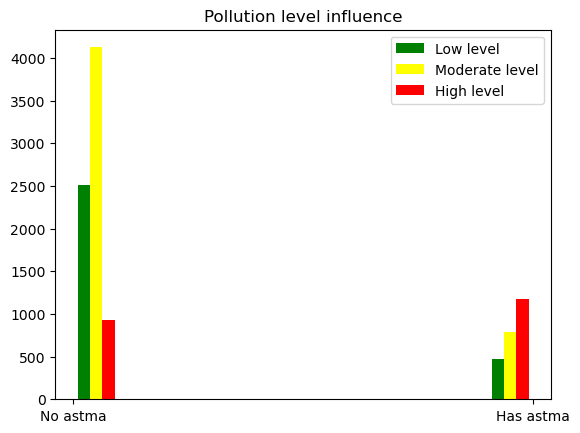

In [180]:
low = data[data["Air_Pollution_Level"] == "Low"]["Has_Asthma"]
mod = data[data["Air_Pollution_Level"] == "Moderate"]["Has_Asthma"]
high = data[data["Air_Pollution_Level"] == "High"]["Has_Asthma"]

plt.title("Pollution level influence")
plt.hist([low, mod, high], color=["green", "yellow", "red"], label=["Low level", "Moderate level", "High level"])
plt.xticks([0, 1], ["No astma", "Has astma"])
plt.legend()

In [181]:
data.replace({"Gender": {"Female": 0, "Male": 1}}, inplace=True)
data.replace({"Allergies": {"Dust": 0, "Pollen": 1, "Pets": 2, "Multiple": 3}}, inplace=True)
data.replace({"Smoking_Status": {"Never": 0, "Former": 1, "Current": 2}}, inplace=True)
data.replace({"Air_Pollution_Level": {"Low": 0, "Moderate": 1, "High": 2}}, inplace=True)
data.replace({"Physical_Activity_Level": {"Sedentary": 0, "Moderate": 1, "Active": 2}}, inplace=True)
data.replace({"Occupation_Type": {"Indoor": 0, "Outdoor": 1}}, inplace=True)
data.replace({"Comorbidities": {"Diabetes": 0, "Hypertension": 1, "Both": 2}}, inplace=True)

In [183]:
data

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,52,0,27.6,1,1,0,1,0,1,0,0.38,0,421.0,46.0,0,No astma
1,15,1,24.6,1,0,0,0,1,0,2,0.60,2,297.6,22.9,0,No astma
2,72,0,17.6,0,0,0,1,1,0,0,0.38,0,303.3,15.3,0,No astma
3,61,1,16.8,0,0,3,2,0,1,2,0.60,1,438.0,40.1,1,Poorly Controlled
4,21,1,30.2,0,0,0,1,2,0,0,0.82,3,535.0,27.7,0,No astma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,1,25.0,0,0,0,0,0,0,0,0.67,0,580.6,18.7,0,No astma
9996,78,0,24.8,0,0,1,0,1,0,0,0.72,1,417.6,40.8,0,No astma
9997,58,1,30.1,1,1,1,0,1,0,0,0.28,0,459.1,20.3,1,Not Controlled
9998,88,0,31.2,1,0,1,1,1,0,0,0.44,0,415.9,25.0,0,No astma
